In [116]:
#import libraries 
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix

In [91]:
#import data 
red_wine = pd.read_csv("wine+quality\winequality-red.csv", sep= ';', delimiter=None) 
white_wine = pd.read_csv("wine+quality\winequality-white.csv", sep= ';', delimiter=None) 

#make a copy
rw = red_wine
ww = white_wine

In [92]:
#remove all duplicates 
rw.drop_duplicates(inplace=True)
ww.drop_duplicates(inplace=True)

In [93]:
#unify column names 
rw.rename(columns = {'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
ww.rename(columns = {'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [94]:
#add a column 
rw.insert(12, "colour", 'red')
ww.insert(12, "colour", 'white')

In [95]:
#add quality label column - low 1-4, medium 5-6, high 7-10 
rw['quality_label'] = rw['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium'
if value <= 6 else 'high')
rw['quality_label'] = pd.Categorical(rw['quality_label'], 
categories=['low', 'medium', 'high']) 

ww['quality_label'] = ww['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium'
if value <= 6 else 'high')
ww['quality_label'] = pd.Categorical(ww['quality_label'], 
categories=['low', 'medium', 'high']) 

In [96]:
#combine data sets 
data = [rw, ww]
df_clean = pd.concat(data)
df_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,high


In [97]:
#check colour column, data type 
df_clean["colour"].unique()

array(['red', 'white'], dtype=object)

In [98]:
df1 = df_clean.copy()

One-Hot Encoder

In [99]:
#use One-Hot Encoder to convert the colour column from categorical str object to readable numbers 
df1["colour"] = (df1["colour"] == "red").astype(int)

In [100]:
df_clean.colour.value_counts()

white    3961
red      1359
Name: colour, dtype: int64

In [101]:
#using value_counts to check dtype 
df1.colour.value_counts()
#0 ist white 
#1 is red

0    3961
1    1359
Name: colour, dtype: int64

Label Encoder 

In [102]:
#use label encoder to transfer quality label into ml readable numeric
#first save label encoder 
lbl_enc = LabelEncoder()

#use function fit transform 
df1['quality_label'] = lbl_enc.fit_transform(df1['quality_label'])

In [103]:
df_clean.quality_label.value_counts()

medium    4075
high      1009
low        236
Name: quality_label, dtype: int64

In [104]:
df1['quality_label'].value_counts()
# low is 1 
# medium is 2  
# high is 0 

2    4075
0    1009
1     236
Name: quality_label, dtype: int64

In [105]:
# FYI could use ordinal encoder for quality label 
# i could loose information using the label encoder? but LMS suggests it 

Histogram for visualisation 

In [106]:
df1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,2


Plot the effects of each column on quality label 

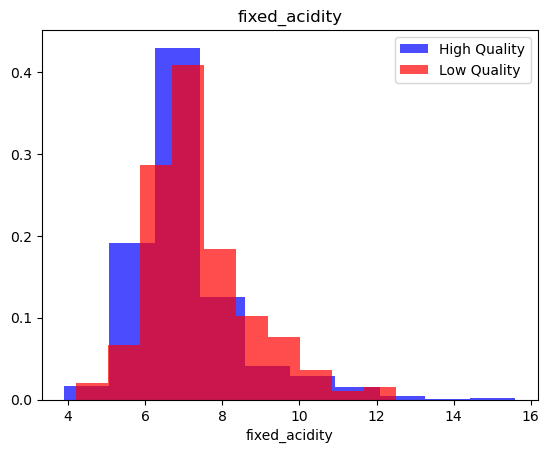

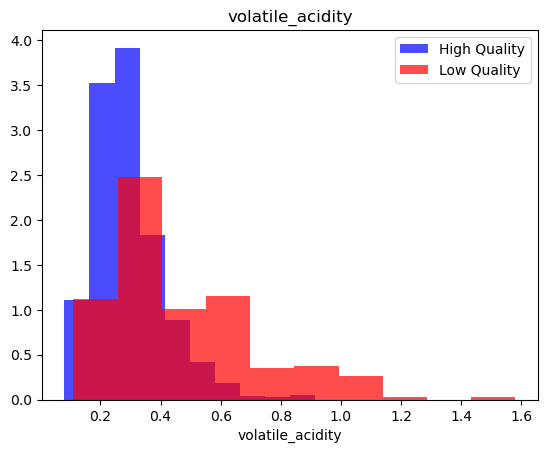

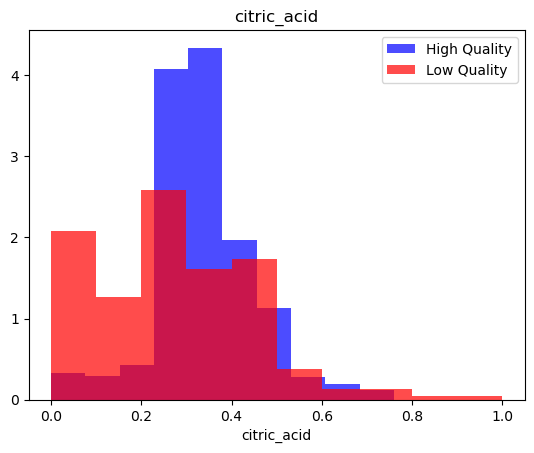

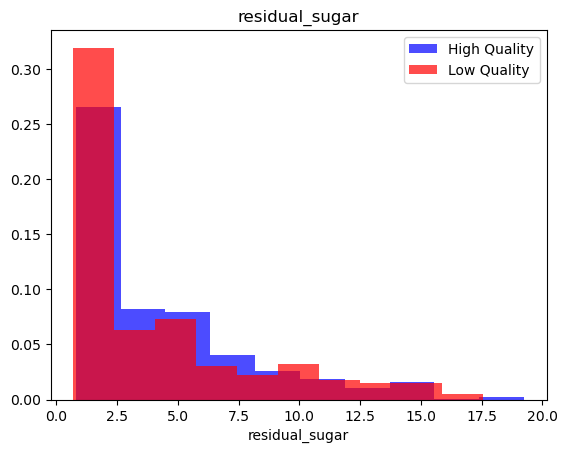

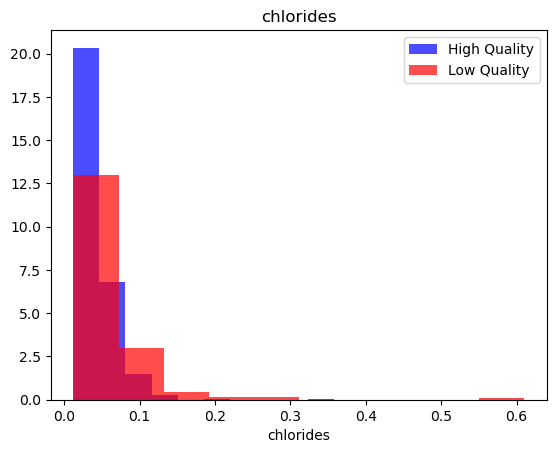

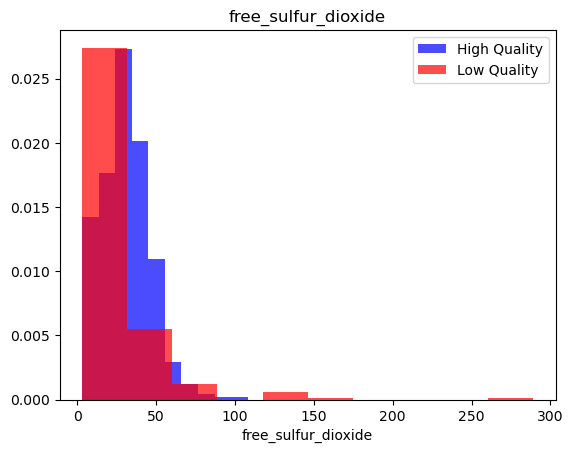

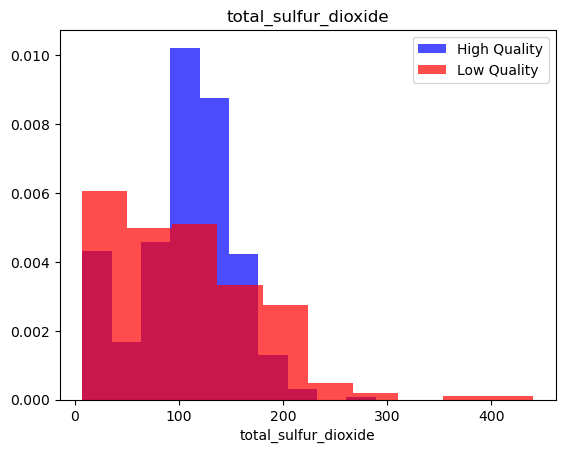

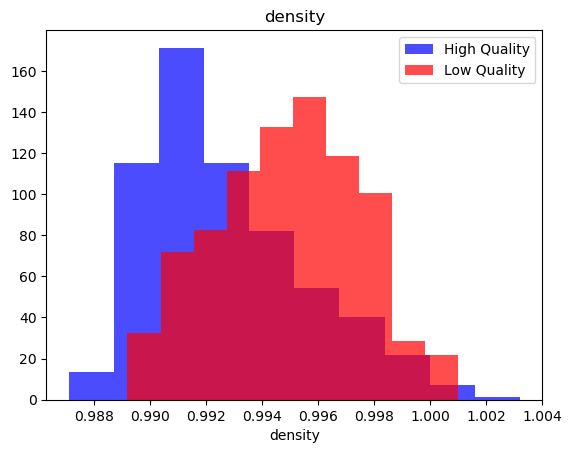

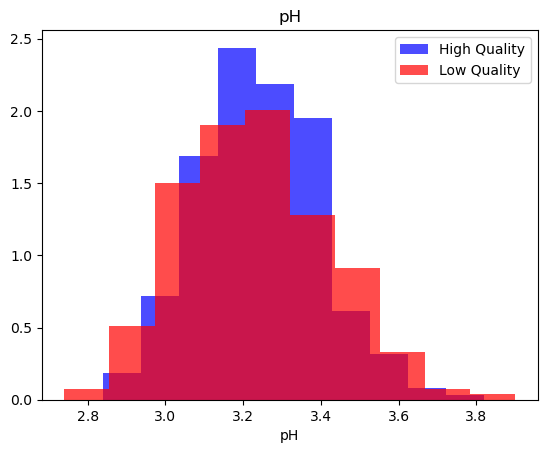

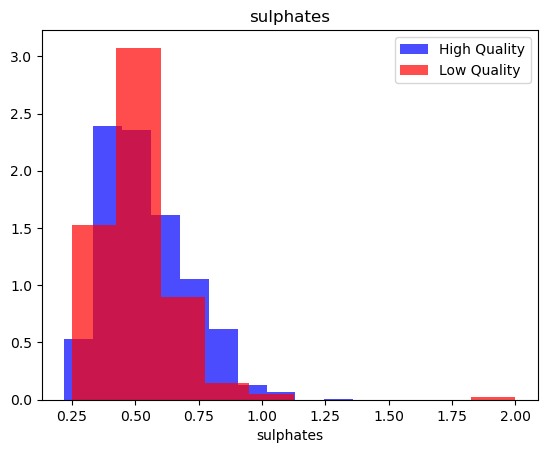

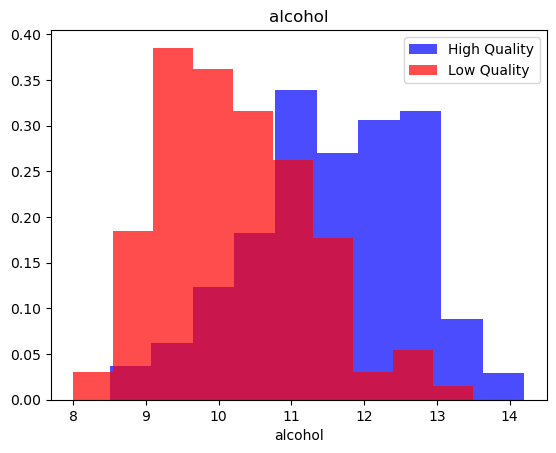

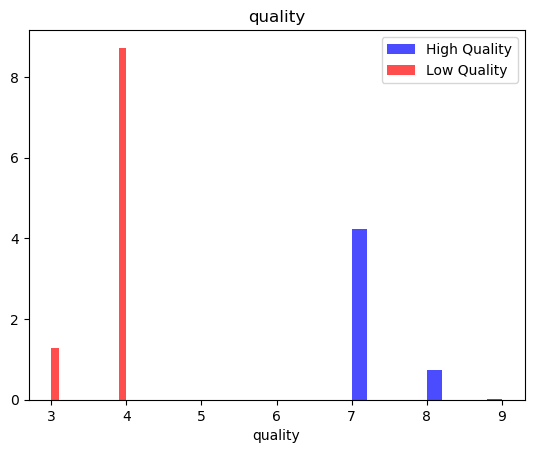

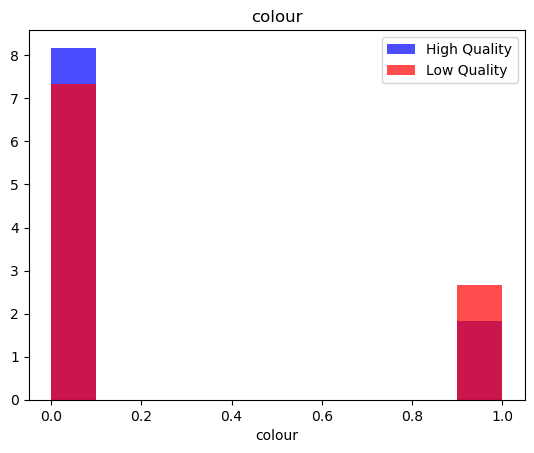

In [107]:
for label in df1.columns[:-1]:
    plt.hist(df1[df1["quality_label"]==0][label], color = 'blue', label = 'High Quality', alpha = 0.7, density=True)
    plt.hist(df1[df1["quality_label"]==1][label], color = 'red', label = 'Low Quality', alpha = 0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets 

In [108]:
train, valid, test = np.split(df1.sample(frac=1), [int(0.6*len(df1)), int(0.8*len(df1))])

Scale your data - important for K-Nearest neighbours 

In [109]:
def scale_dataset(df1):
    X = df1[df1.columns[:-1]].values
    y = df1[df1.columns[-1]].values 
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

#numpy horizontally stack them together 
#x is a 2 dimentional object but y is a vector - so one dimentional. so we reshape y to a 2 d array 
    data = np.hstack((X, np.reshape(y, (-1, 1)))) 

    return data, X, y


In [111]:
train, X_train, y_train = scale_dataset(train)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [113]:
y_pred = knn_model.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       199
           1       0.97      0.72      0.83        43
           2       0.98      0.99      0.99       822

    accuracy                           0.98      1064
   macro avg       0.98      0.89      0.93      1064
weighted avg       0.98      0.98      0.98      1064



In [118]:
print(confusion_matrix(y_test, y_pred))

[[193   0   6]
 [  0  31  12]
 [  4   1 817]]
